In [7]:
# dir()
# %reset -f

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def Normalize(data):
    data = (data-data.min(0)) / (data.max(0)-data.min(0))
    return data

class Data_split(object):
    def __init__(self, data, cl = None, trainsize = 0.7, shuffle = True, randomstate = None, scaling = True):
        """Split arrays or matrices into random train and test subsets
        
        Parameters
        ----------
        data: data set input
        
        cl: the index of the column including the classes of every record 
            (default = the last column of data)
            
        trainsize: float, int or None, optional (default=0.7)
            If float, should be between 0.0 and 1.0 and represent the proportion 
            of the dataset to include in the test split. If int, represents the
            absolute number of test samples. If None, the value is set to the
            complement of the train size. By default, the value is set to 0.25
            
        shuffle: 
            Whether or not to shuffle the data before splitting.
                    
        """
        np0 = data.shape
        self.n = np0[0]
        self.p = np0[1]
        self.shuffle = shuffle
        self.rs = randomstate
        
        if self.shuffle is True:
            if self.rs is not None: 
                np.random.seed(self.rs)
            self.data = np.random.permutation(data)
        self.cl = self.p-1 if cl is None else cl
        self.X = np.delete(self.data, self.cl, axis=1)
        
        if scaling is True:
            self.X = Normalize(self.X)
        self.Y = self.data[:, self.cl]
        self.trainsize = trainsize
        
    def data_split(self):
        """
        Returns: trainx, trainy, testx, testy
        """
        if type(self.trainsize) == int:
            self.trainsize = trainsize
        elif type(self.trainsize)  == float or self.trainsize is None:
            if self.trainsize <0 or self.trainsize>1:
                raise ValueError("The proportion of training data should between 0.0 and 1.0")
            else:
                self.trainsize = int(self.trainsize * self.n)
        self.trainX = self.X[0:self.trainsize, :]
        self.trainY = self.Y[0:self.trainsize]
        self.testX = self.X[self.trainsize:, :]
        self.testY = self.Y[self.trainsize:]
        trainX = self.trainX
        trainY = self.trainY
        testX = self.testX
        testY = self.testY
        return trainX, trainY, testX, testY

def predict(trainx, trainy, testx, k):
    distances = []
    targets = []
    
    for i in range(len(trainx)):
        # euclidean distance
        distance = np.sqrt(np.sum(np.square(testx - trainx[i, :])))
        distances.append([distance, i])

    distances = sorted(distances)
    
    for i in range(k):
        index = distances[i][1]
        targets.append(trainy[index])
        
    return Counter(targets).most_common(1)[0][0]
    
def kNearestNeighbor(trainx, trainy, testx, predictions, k):    
    for i in range(len(testx)):
        predictions.append(predict(trainx, trainy, testx[i, :], k))

def Error(SData):
    error = []
    trainx, trainy, testx, testy = SData.data_split()
    for i in neighbors:
        predictions = []
        kNearestNeighbor(trainx, trainy, testx, predictions, i)
        predictions = np.asarray(predictions)
        error.append( np.mean(predictions != testy) )
    return error

In [125]:
maxk = 11
neighbors = range(1, maxk+1)

## Iris

In [66]:
iris = pd.read_csv('iris.data', header=0)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris = np.asarray(iris)

In [82]:
Ir = Data_split(iris, randomstate = 648)
error = Error(Ir)
Ir = Data_split(iris, randomstate = 648, scaling = False)
error_ori = Error(Ir)

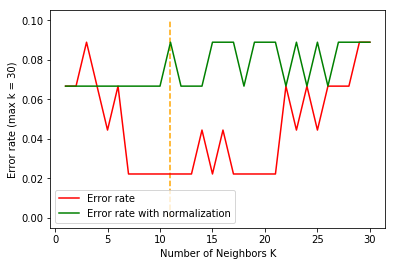

In [84]:
# plt.figure(figsize = (12,6))
plt.plot(neighbors, error_ori, color='red', label='Error rate')
plt.plot(neighbors, error, color = 'green', label = 'Error rate with normalization')
plt.vlines(11, 0, 0.1, colors = "orange", linestyles = "dashed")
plt.xlabel('Number of Neighbors K')
plt.ylabel('Error rate (max k = 30)')
plt.legend(loc = 3)
plt.show()

## Glass

In [126]:
glass = pd.read_csv("glass.data", header = None,
                names = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class'])
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [127]:
glass = np.asanyarray(glass)
#glass.shape

In [128]:
Gl = Data_split(glass, cl=9, randomstate = 648)
error = Error(Gl)
Gl = Data_split(glass, cl=9, randomstate = 648, scaling = False)
error_ori = Error(Gl)

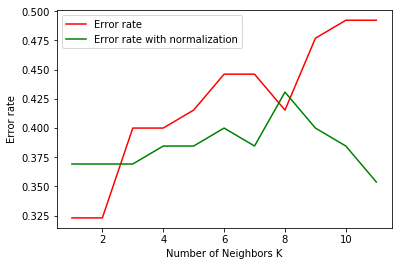

In [130]:
#plt.figure(figsize = (12,6))
plt.plot(neighbors, error_ori, color='red', label='Error rate')
plt.plot(neighbors, error, color = 'green', label = 'Error rate with normalization')
#plt.vlines(11, 0.31, 0.52, colors = "orange", linestyles = "dashed")
plt.xlabel('Number of Neighbors K')
plt.ylabel('Error rate')
plt.legend()
plt.show()

## Wine

In [133]:
wine = pd.read_csv("wine.data", header = None,
                names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 
                         'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 
                         'Proanthocyanins', 'Color intensity', 'Hue', 
                         'OD280/OD315 of diluted wines', 'Proline' ])
wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


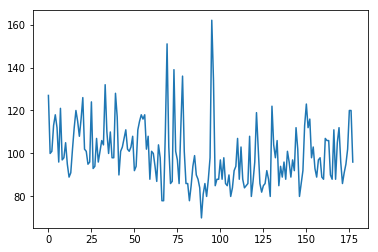

In [136]:
plt.plot(wine['Magnesium'])

In [118]:
wine = np.asarray(wine)
# wine.shape

In [119]:
Wn = Data_split(wine, cl=0, randomstate = 648)
error = Error(Wn)
Wn = Data_split(wine, cl=0, randomstate = 648, scaling = False)
error_ori = Error(Wn)

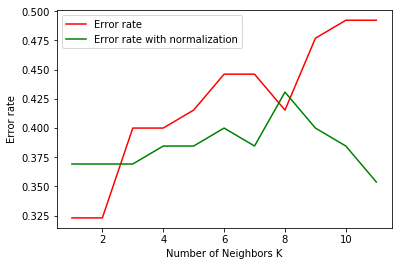

In [131]:
plt.figure(figsize = (6,4))
plt.plot(neighbors, error_ori, color='red', label='Error rate')
plt.plot(neighbors, error, color = 'green', label = 'Error rate with normalization')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Error rate')
plt.legend()
plt.show()

In [121]:
wine0 = wine
wine0[:,13] = Normalize(wine[:,13])
Wn = Data_split(wine0, cl=0, randomstate = 648, scaling = False)
error_13 = Error(Wn)

wine1 = wine
wine1[:,13] = Normalize(wine[:,13])
wine1[:,5] = Normalize(wine[:,5])
Wn = Data_split(wine1, cl=0, randomstate = 648, scaling = False)
error_13_5 = Error(Wn)

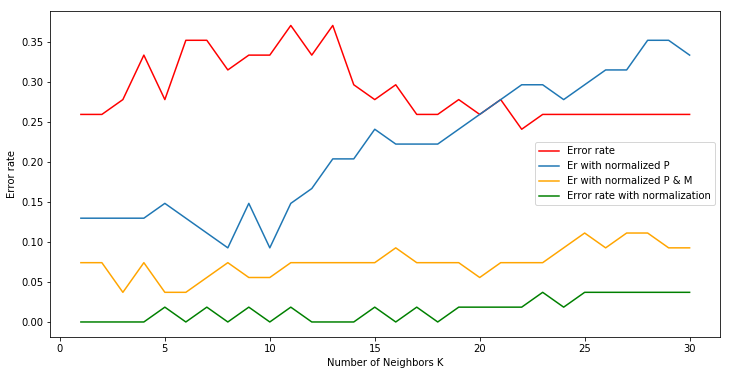

In [124]:
plt.figure(figsize = (12,6))
plt.plot(neighbors, error_ori, 'r', label='Error rate')
plt.plot(neighbors, error_13, label='Er with normalized P')
plt.plot(neighbors, error_13_5, 'orange', label='Er with normalized P & M')
plt.plot(neighbors, error, color = 'green', label = 'Error rate with normalization')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Error rate')
plt.legend()
plt.show()